Importing the Dependencies

*   NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays.
*   Pandas is defined as an open-source library that provides high-performance data manipulation in Python.Pandas is used to analyze data.
*   Sklearn (or Scikit-learn) is a Python library that offers various features for data processing that can be used for classification, clustering, and model selection.
*   Model_selection is a method for setting a blueprint to analyze data and then using it to measure new data. 
*   Seaborn - data visual(themes) Matplotlib - uses graph
*   Pylab - namespace





In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/parkinsons.csv')

In [ ]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(816, 24)

In [ ]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              816 non-null    object 
 1   MDVP:Fo(Hz)       816 non-null    float64
 2   MDVP:Fhi(Hz)      816 non-null    float64
 3   MDVP:Flo(Hz)      816 non-null    float64
 4   MDVP:Jitter(%)    816 non-null    float64
 5   MDVP:Jitter(Abs)  816 non-null    float64
 6   MDVP:RAP          816 non-null    float64
 7   MDVP:PPQ          816 non-null    float64
 8   Jitter:DDP        816 non-null    float64
 9   MDVP:Shimmer      816 non-null    float64
 10  MDVP:Shimmer(dB)  816 non-null    float64
 11  Shimmer:APQ3      816 non-null    float64
 12  Shimmer:APQ5      816 non-null    float64
 13  MDVP:APQ          816 non-null    float64
 14  Shimmer:DDA       816 non-null    float64
 15  NHR               816 non-null    float64
 16  HNR               816 non-null    float64
 1

-->Jitter - adding a small amount of variability(horizontal or vertical) to the data to ensure all data points are visible.
-->Multidimensional Voice Program (MDVP) analysis.
-->Neural Human Renderer (NHR)
-->Harmonics-to-noise ratio
-->perceived phonatory effort (PPE)

In [ ]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,...,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,152.501127,194.443569,115.835152,0.006300,0.000045,0.003337,0.003544,0.010010,0.030243,0.287230,...,0.047786,0.024330,21.881348,0.764706,0.498208,0.721854,-5.643125,0.229018,2.376245,0.210822
std,41.215536,90.164755,42.611644,0.004793,0.000035,0.002920,0.002781,0.008759,0.018957,0.195258,...,0.030574,0.039531,4.347437,0.424443,0.103183,0.057018,1.093596,0.082861,0.376377,0.091702
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,116.972750,134.225500,85.286250,0.003460,0.000020,0.001660,0.001875,0.004987,0.016538,0.148750,...,0.024870,0.006040,19.251750,1.000000,0.419943,0.675984,-6.433189,0.176160,2.101070,0.140784
50%,147.467500,166.172500,104.558500,0.004960,0.000035,0.002520,0.002775,0.007560,0.023255,0.222000,...,0.038515,0.011745,21.904500,1.000000,0.490441,0.724630,-5.659058,0.221301,2.344612,0.200156
75%,180.393000,220.561250,134.073500,0.007432,0.000060,0.003895,0.004160,0.011690,0.039960,0.364250,...,0.062445,0.024445,25.030500,1.000000,0.590205,0.764055,-4.913698,0.280473,2.614510,0.260105
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    624
0    192
Name: status, dtype: int64

1 --> Parkinson's Positive

0 --> Healthy

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


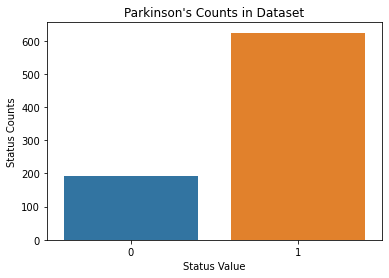

In [ ]:
#Count Plot
sns.countplot(parkinsons_data['status'].values)
plt.xlabel('Status Value')
plt.ylabel('Status Counts')
plt.title("Parkinson's Counts in Dataset")
plt.show()


In [ ]:
X=parkinsons_data.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,12,14,15,16,18,19,20,21,22,23]].values
y=parkinsons_data.iloc[:,17].values
print(X)
print(y)

[[119.992    157.302     74.997    ...   0.266482   2.301442   0.284654]
 [122.4      148.65     113.819    ...   0.33559    2.486855   0.368674]
 [116.682    131.111    111.555    ...   0.311173   2.342259   0.332634]
 ...
 [120.267    137.244    114.82     ...   0.257682   1.854785   0.211756]
 [107.332    113.84     104.315    ...   0.183721   2.064693   0.163755]
 [ 95.73     132.068     91.754    ...   0.327769   2.322511   0.231571]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 

In [ ]:
#Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1)

-->StandardScaler is used to resize the distribution of values 

In [ ]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) 

PCA Principal component analysis 

-->Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

-->The fit(data) method is used to compute the mean and std dev for a given feature so that it can be used further for scaling.
-->The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.
-->The fit_transform() method does both fit and transform.

In [ ]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
variance = pca.explained_variance_ratio_
variance.tolist()

[0.5852299890669219,
 0.11698783751339317,
 0.07545762000278408,
 0.06505981652017823,
 0.044910575450693394,
 0.03263159079652995,
 0.024078681339491047,
 0.016064227159829143,
 0.013825551372057831,
 0.010094391402495663,
 0.004797147807497222,
 0.0034609282974598266,
 0.0032047099560687234,
 0.0018518666377887155,
 0.0009469735677758619,
 0.0007020386417161535,
 0.0004140941026169753,
 0.00021291508140662058,
 6.902577697286469e-05,
 1.8035351245051623e-08,
 1.4709713825872318e-09,
 7.607708472606225e-34]

In [ ]:
#N components = 2
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Shape after applying PCA
X_train.shape

(652, 2)

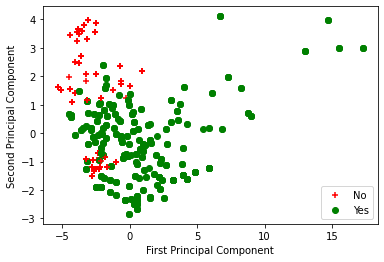

In [ ]:
#Data after PCA
for i in range(0, X_train.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(X_train[i,0],X_train[i,1],c='r', marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(X_train[i,0],X_train[i,1],c='g', marker='o')
pl.xlabel("First Principal Component")
pl.ylabel("Second Principal Component")
pl.legend([c1, c2], ['No', 'Yes'])
pl.show()

In [ ]:
# grouping the data based on the target variable
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,143.443699,185.461051,106.797571,0.007049,0.000052,0.003771,0.004002,0.011313,0.034128,0.325468,...,0.027722,0.053717,0.028283,21.020609,0.515333,0.729896,-5.299698,0.250165,2.444477,0.237839


Data Pre-Processing

Separating the features & Target

droping :
        cols mean axis = 1,
        rows mean axis = 0

In [ ]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
811      116.014       141.781       110.655         0.01284   
812      120.552       131.162       113.787         0.00968   
813      120.267       137.244       114.820         0.00333   
814      107.332       113.840       104.315         0.00290   
815       95.730       132.068        91.754         0.00551   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
811    1
812    1
813    1
814    1
815    1
Name: status, Length: 816, dtype: int64


Splitting the data to training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(816, 22) (652, 22) (164, 22)


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[-0.09765755 -0.36986282  0.61253549 ... -0.16136504  0.80276941
  -0.15687591]
 [-0.90303887 -0.790127   -0.17667273 ... -0.38220117 -1.07310625
  -0.30495805]
 [-0.79075973 -0.4116579  -0.97233863 ...  0.44649651 -0.20329439
   0.78682078]
 ...
 [ 0.69394451  0.06233332  0.93180006 ...  1.04399692  1.91890434
  -0.1274288 ]
 [ 1.57372417  0.43153798 -0.52335286 ...  1.93130697  1.45975788
   0.09219255]
 [ 1.09785243  0.25605619 -0.59866874 ... -0.78611633  1.34413631
  -0.1007712 ]]


Model Training

Support Vector Machine Model

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9279141104294478


In [ ]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8963414634146342


Building a Predictive System

In [ ]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
